In [334]:
import pandas as pd
import seaborn as sns
import os

Which country shall we plot?

In [337]:
country = 'DNK'

Prepare the dataframe: Read in all 5 SSPs, combine them into one dataframe, and pick out only the rows for the current country:

In [338]:
SSP1 = pd.read_csv(os.path.expanduser('~') + '/Dropbox/CISCdata/SSPs/pop-SSP1.csv', index_col="ISO").assign(SSP="SSP1")

SSP2 = pd.read_csv(os.path.expanduser('~') + '/Dropbox/CISCdata/SSPs/pop-SSP2.csv', index_col="ISO").assign(SSP="SSP2")

SSP3 = pd.read_csv(os.path.expanduser('~') + '/Dropbox/CISCdata/SSPs/pop-SSP3.csv', index_col="ISO").assign(SSP="SSP3")

SSP4 = pd.read_csv(os.path.expanduser('~') + '/Dropbox/CISCdata/SSPs/pop-SSP4.csv', index_col="ISO").assign(SSP="SSP4")

SSP5 = pd.read_csv(os.path.expanduser('~') + '/Dropbox/CISCdata/SSPs/pop-SSP5.csv', index_col="ISO").assign(SSP="SSP5")

SSPs = pd.concat([SSP1, SSP2, SSP3, SSP4, SSP5])
SSPs.rename(columns={'Major area, region, country or area':'Name'},inplace=True)
SSPs.drop(columns=['Country code'], inplace=True)

SSPs.loc[country]

,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,Name,SSP
ISO,,,,,,,,,,,,
DNK,5550142,5836092,6170396,6487935,6793000,7105061,7386269,7601519,7723963,7707959,Denmark,SSP1
DNK,5550142,5806201,6086939,6337650,6573973,6824660,7046937,7224611,7354193,7425535,Denmark,SSP2
DNK,5550142,5685568,5693821,5607919,5454155,5257835,5027092,4755509,4435718,4090700,Denmark,SSP3
DNK,5550142,5760678,5919214,6009885,6036789,6011538,5919506,5756715,5516569,5211779,Denmark,SSP4
DNK,5550142,5930095,6489382,7092074,7784703,8598445,9436525,10264693,11067483,11755686,Denmark,SSP5


To make the plotting easier, we'll pull out the name and then turn then transpose the table, turning rows to columns:

In [339]:
filtered=SSPs.loc[country]
filtered.set_index('SSP',inplace=True)
filtered.index.names = ['Index']
plotframe = filtered.transpose()
plotframe

Index,SSP1,SSP2,SSP3,SSP4,SSP5
2010,5550142,5550142,5550142,5550142,5550142
2020,5836092,5806201,5685568,5760678,5930095
2030,6170396,6086939,5693821,5919214,6489382
2040,6487935,6337650,5607919,6009885,7092074
2050,6793000,6573973,5454155,6036789,7784703
2060,7105061,6824660,5257835,6011538,8598445
2070,7386269,7046937,5027092,5919506,9436525
2080,7601519,7224611,4755509,5756715,10264693
2090,7723963,7354193,4435718,5516569,11067483
2100,7707959,7425535,4090700,5211779,11755686


Pick up the country name:

In [340]:
country_name = plotframe.iloc[10,1]
country_name

'Denmark'

… and remove that last row:

In [341]:
plotframe = plotframe[:-1]
plotframe

Index,SSP1,SSP2,SSP3,SSP4,SSP5
2010,5550142,5550142,5550142,5550142,5550142
2020,5836092,5806201,5685568,5760678,5930095
2030,6170396,6086939,5693821,5919214,6489382
2040,6487935,6337650,5607919,6009885,7092074
2050,6793000,6573973,5454155,6036789,7784703
2060,7105061,6824660,5257835,6011538,8598445
2070,7386269,7046937,5027092,5919506,9436525
2080,7601519,7224611,4755509,5756715,10264693
2090,7723963,7354193,4435718,5516569,11067483
2100,7707959,7425535,4090700,5211779,11755686


Currently, the year is the index; we need to make it a regular column before plotting:

In [342]:
#plotframe = plotframe.reset_index()
#plotframe = plotframe.rename(columns={'index':'Year'})
plotframe

Index,SSP1,SSP2,SSP3,SSP4,SSP5
2010,5550142,5550142,5550142,5550142,5550142
2020,5836092,5806201,5685568,5760678,5930095
2030,6170396,6086939,5693821,5919214,6489382
2040,6487935,6337650,5607919,6009885,7092074
2050,6793000,6573973,5454155,6036789,7784703
2060,7105061,6824660,5257835,6011538,8598445
2070,7386269,7046937,5027092,5919506,9436525
2080,7601519,7224611,4755509,5756715,10264693
2090,7723963,7354193,4435718,5516569,11067483
2100,7707959,7425535,4090700,5211779,11755686


If we try to plot, now this won't work. Here's why:

In [343]:
plotframe.dtypes

Index
SSP1    object
SSP2    object
SSP3    object
SSP4    object
SSP5    object
dtype: object

Let's fix that: Convert all columns to integers.

In [344]:
for col in plotframe.columns:
    plotframe[col] = plotframe[col].astype(str).astype(int)

# plotframe.dtypes

/Users/carsten/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


To make plotting easier, let's stack them up:

In [345]:
plotframe = plotframe.stack()
plotframe = plotframe.reset_index()
# plotframe

Fix the column names once more, and turn the population column into millions:

In [346]:
plotframe.rename(columns={'level_0':'Year', 'Index':'SSP', 0:'Population (millions)'},inplace=True)
plotframe['Population (millions)'] = plotframe['Population (millions)'] / 1000000.0
# plotframe

Now plotting is as easy as:

Text(0.5,1,'Denmark')

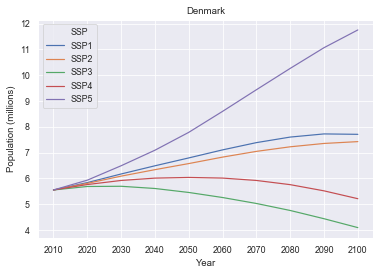

In [347]:
sns.set() # switch to standard 'dark' Seaborn style 
sns.set_context("paper")
#sns.lineplot(data=plotframe, x="Year", y="Population (millions)")
plot = sns.lineplot(data=plotframe, x="Year", y="Population (millions)", hue="SSP")
plot.set_title(country_name)


Save a PDF of the plot

In [348]:
fig = plot.get_figure()
fig.savefig('plots/'+country_name+'.pdf') 